# Computer Price Prediction Using Regression 

## 1. Introduction:

### Exploratory Question:

## 2. Loading data:

We begin the analysis by loading the data set to get a better understading of the data

### 2.1 Import Libraries

In [46]:
# Import all the Required libraries 

# Data Analysis & Visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objs as go

# Model Building
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# visualisation modifiers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

### 2.2 Load Dataset

In [22]:
data = pd.read_csv('laptop_data_cleaned.csv')
data.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [23]:
data['Gpu_brand'].value_counts()

Gpu_brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

## 3. Data Cleaning and Summary:

Shape of dataset (1273, 13)

| Variable Name      | Type of Variable | Explanation |
| ----------- | :-----------: | ----------- |
| `Company`     | chr       | The brand of that laptop |
| `TypeName`   | chr        | The categories of which type the laptop is|
| `Ram`   | int        | RAM of the laptop |
| `Weight`   | int       | How heavy the laptop is|
| `Price`   | int        | The total price of that computer|
| `TouchScreen`   | int        | Define whether the laptop's screen has touch screen or not|
| `Ips`   | int        | Define whether the laptop has the In Plane Switching (IPS) display or not|
| `Ppi`   | int        | Laptop's pixel per inches |
| `Cpu_brand`   | chr        | The brand of CPU|
| `HDD`   | int        | Hard disk drives of the laptop|
| `SSD`   | int        | Solid-state drive of the laptop|
| `Gpu_brand`   | chr        | The brand of GPU|
| `Os`   | chr        | The catrgories of which type of Operating System the laptop is|


- From above output, we could have that there are totals 1273 variables in the dataset with 13 variables in which 5 of them are categorical and 8 numerical attributes.



In [24]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


### 3.2 Data Cleaning

In [25]:
data.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [26]:
data.duplicated().sum()

1

In [27]:
data = data.drop_duplicates()
data.shape

(1272, 13)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   object 
 1   TypeName     1272 non-null   object 
 2   Ram          1272 non-null   int64  
 3   Weight       1272 non-null   float64
 4   Price        1272 non-null   float64
 5   TouchScreen  1272 non-null   int64  
 6   Ips          1272 non-null   int64  
 7   Ppi          1272 non-null   float64
 8   Cpu_brand    1272 non-null   object 
 9   HDD          1272 non-null   int64  
 10  SSD          1272 non-null   int64  
 11  Gpu_brand    1272 non-null   object 
 12  Os           1272 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 139.1+ KB


In [30]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,8.451258,2.041761,10.828035,0.147013,0.279874,146.936126,414.040881,186.298742
std,5.099249,0.669088,0.619774,0.354258,0.449114,42.940459,518.128204,186.597777
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [34]:
data.corr(numeric_only = True)

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.388629,0.681019,0.113073,0.202473,0.295336,0.096845,0.599540
Weight,0.388629,1.000000,0.151861,-0.292900,0.023368,-0.319291,0.510531,-0.057331
Price,0.681019,0.151861,1.000000,0.194436,0.279483,0.480621,-0.097155,0.658962
TouchScreen,0.113073,-0.292900,0.194436,1.000000,0.136800,0.452313,-0.205431,0.252067
Ips,0.202473,0.023368,0.279483,0.136800,1.000000,0.289112,-0.090839,0.215085
Ppi,0.295336,-0.319291,0.480621,0.452313,0.289112,1.000000,-0.290595,0.500062
HDD,0.096845,0.510531,-0.097155,-0.205431,-0.090839,-0.290595,1.000000,-0.400937
SSD,0.599540,-0.057331,0.658962,0.252067,0.215085,0.500062,-0.400937,1.000000


<Axes: >

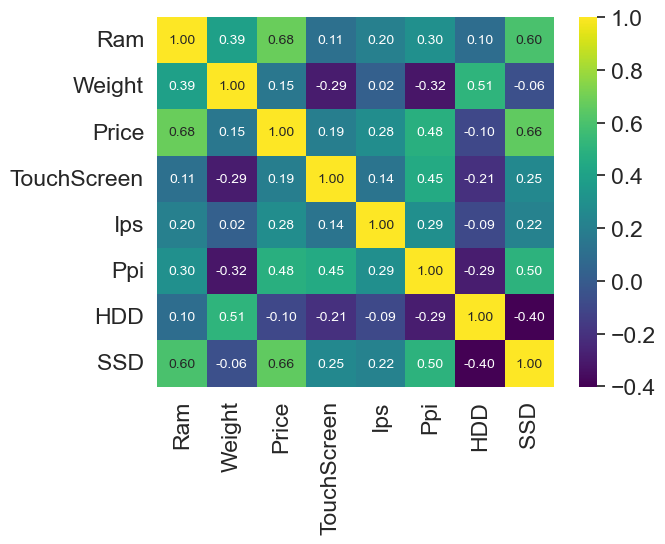

In [40]:
sns.heatmap(data.corr(numeric_only=True), cmap= "viridis", annot = True, fmt = ".2f", annot_kws={"size":10})

## 4. Exploratory Data Analysis:

### 4.1 Univariative Analysis:

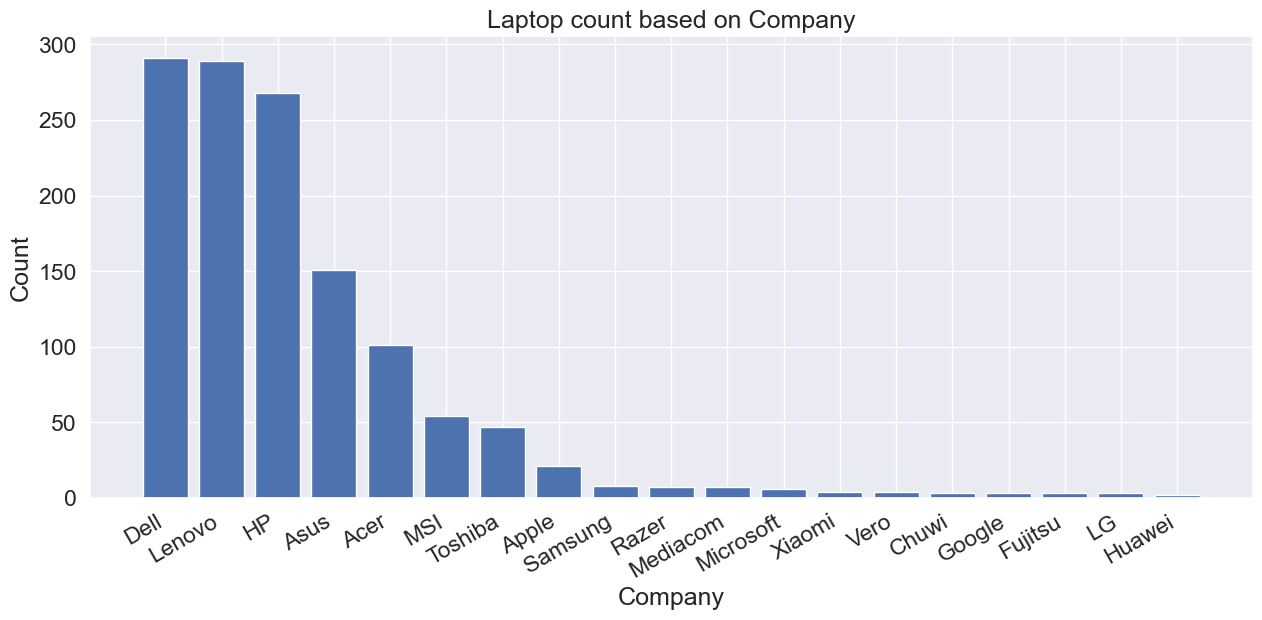

In [44]:
value_counts = data["Company"].value_counts()

value_counts_values = value_counts.values[:]
value_counts_index = value_counts.index[:]

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(value_counts_index, value_counts_values)
ax.set_xlabel("Company")
ax.set_ylabel("Count")
ax.set_title("Laptop count based on Company")
plt.xticks(rotation=30, ha='right')
plt.show()

In [49]:
def tar_var_summary(data, target):
    fig = go.Figure()
    fig.add_trace(go.Violin(x=data[target], line_color='#6C9BCF', name='Happy', y0=0))
    fig.update_traces(orientation='h', side='positive', meanline_visible=False)
    fig.update_layout(title={'text': 'Distribution of the Laptop Price',
                             'y':0.9,
                             'x':0.5,
                             'xanchor':'center',
                             'yanchor':'top'},
                             barmode='overlay',
                             xaxis = dict(title = 'Price'),
                             yaxis=dict(title='Count'),
                             template = 'plotly_white')
    fig.show()
    
tar_var_summary(data, 'Price')

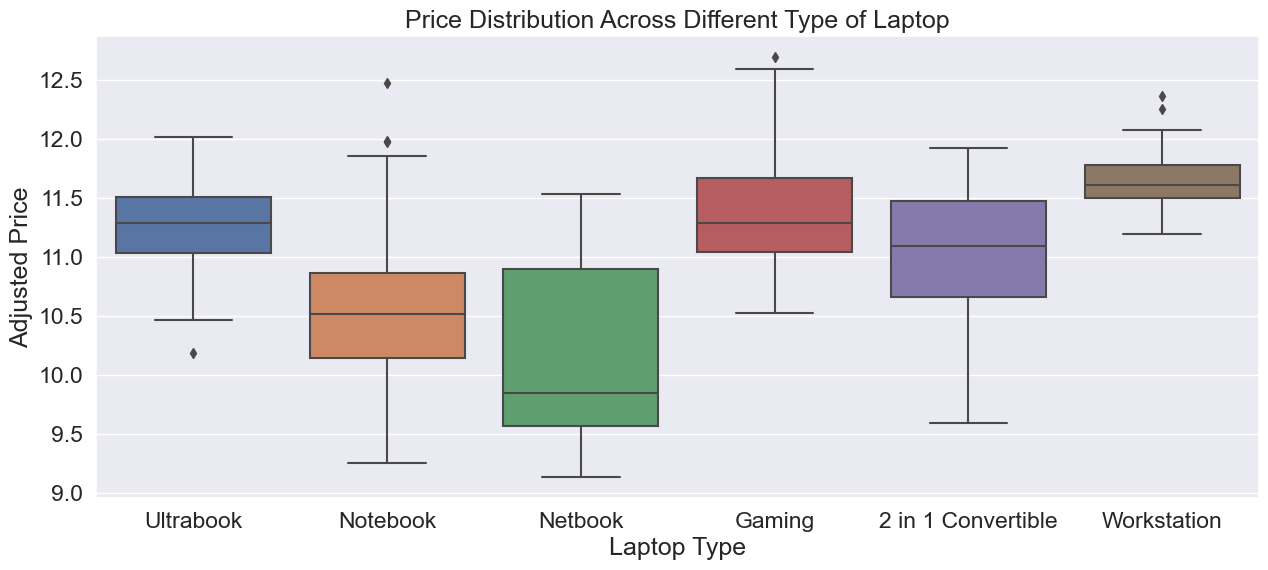

In [50]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='TypeName', y='Price')
plt.title('Price Distribution Across Different Type of Laptop')
plt.xlabel('Laptop Type')
plt.ylabel('Adjusted Price')
plt.show()

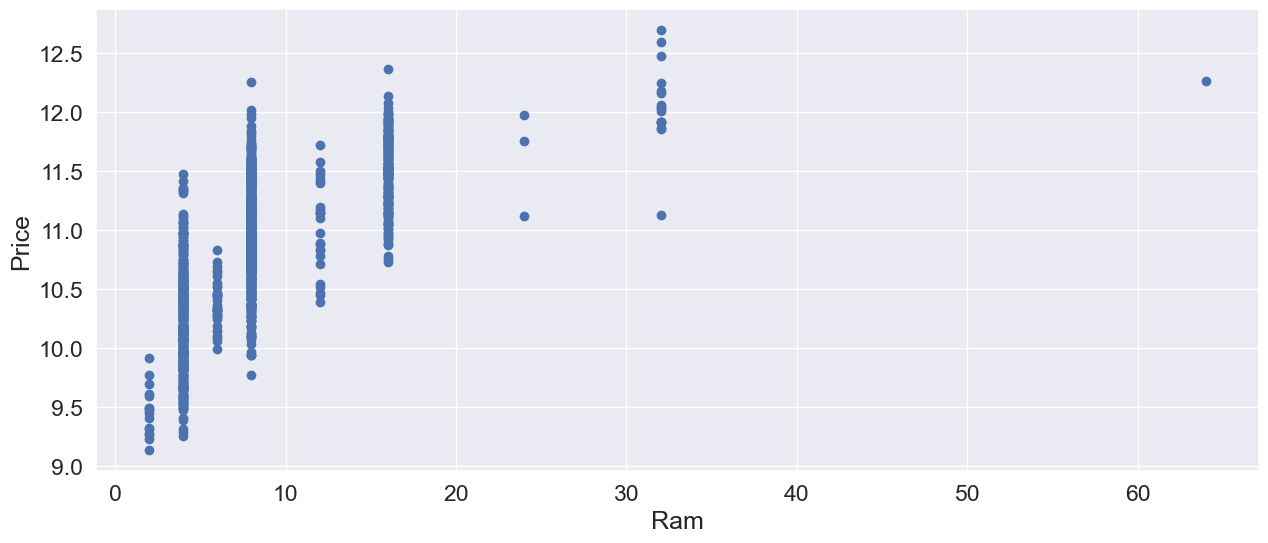

In [61]:
plt.figure(figsize=(15, 6))
plt.scatter(data=data, x='Ram', y='Price')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

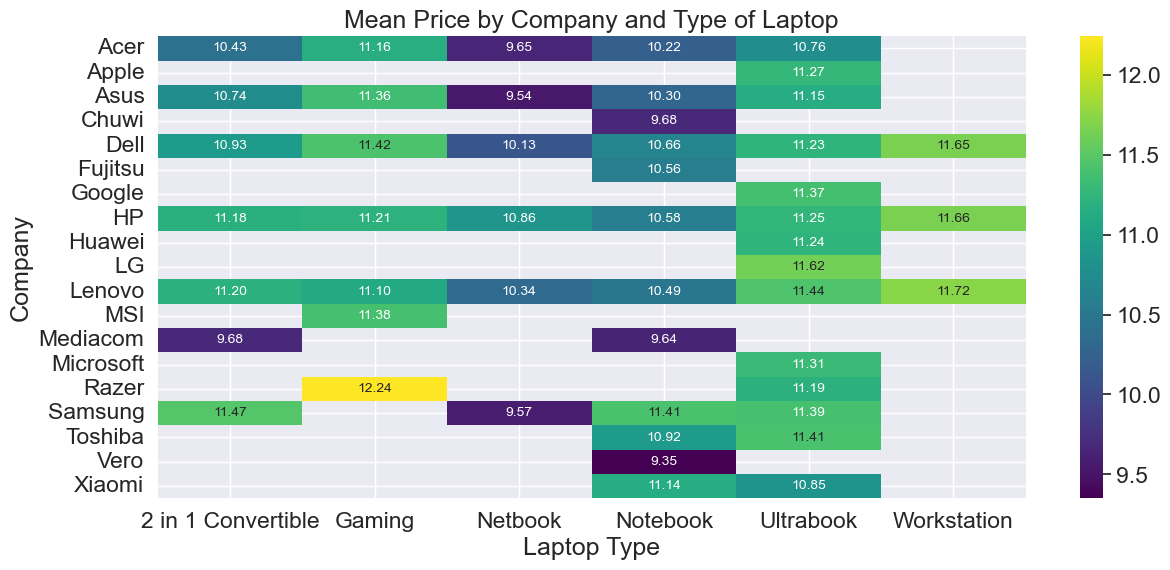

In [53]:
df = data.copy()

#  Median salary by job title
pivot_table = df.pivot_table(values='Price', index='Company', columns='TypeName', aggfunc='mean')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap= "viridis", annot = True, fmt = ".2f", annot_kws={"size":10})
plt.title('Mean Price by Company and Type of Laptop')
plt.xlabel('Laptop Type')
plt.ylabel('Company')
plt.show()

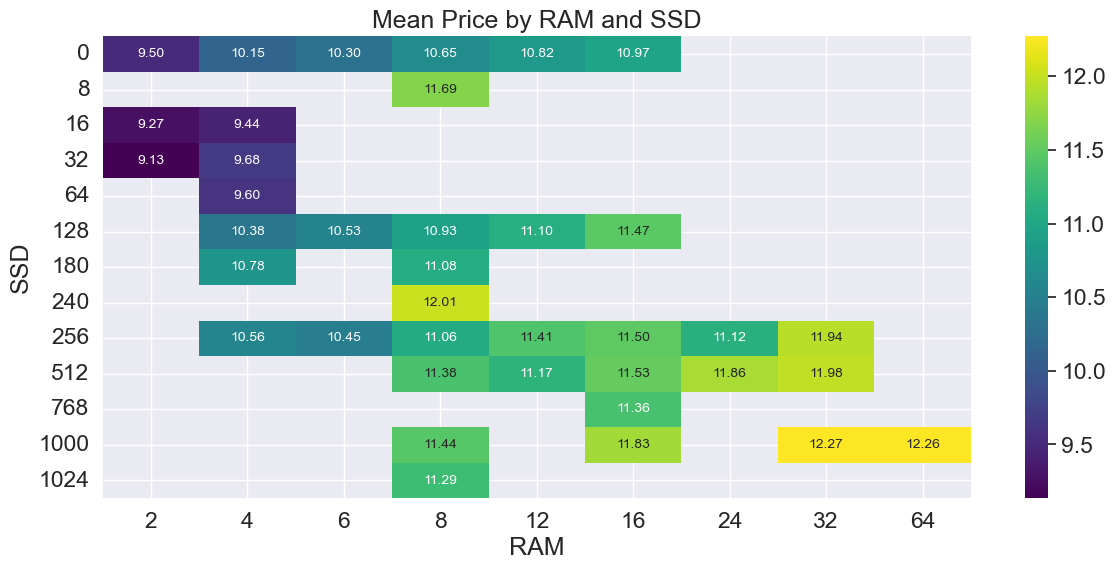

In [55]:
df = data.copy()

#  Median salary by job title
pivot_table = df.pivot_table(values='Price', index='SSD', columns='Ram', aggfunc='mean')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap= "viridis", annot = True, fmt = ".2f", annot_kws={"size":10})
plt.title('Mean Price by RAM and SSD')
plt.xlabel('RAM')
plt.ylabel('SSD')
plt.show()